<div >
<center>
<font size = 8>
DML lab
</font>
<br>
<font size = 5>

Professor.Hamid R. Rabiee
</font>
<font size = 4>
<br>
supervisor. Dr.Hamed dashti
<br>
student.amirhossein bagheri
<br>
<font size = 3>
ahbagheri01@gmail.com
</font>
</font>
</center>

<div >
<center>
<font size = 5>
task introduction
</font>
</center>
in this task we are going to train a model on images containing textual data which are rotated or captured in a way that lines are'nt horizontal.
</div>
<div>
<center>
<font size = 5>
challenges
</center>
</font>
1. how to provide dataset 
<br>
I provided 1216 512*512 RGB images to train model<br> details are explaind in report PDF <br>
<br>
2. design a good model 
<div>
<center>
<font size = 5>
brief view of model
</font>
</center>
our model should predict the angel that image's been rotated or captured so we can rotate the picture opposite to get the line-horizontaled image.
<br>
so our problem is regression type problem to design this model we use Transfer Learning<br>
using ResNet50 and drop the last layer which is FC with 1000 output i replace it with a FC with 1 output and  bounded Relu as activation function(bounded between 0 and 359).
we train the FC layer once and save the model.


In [61]:
# import packages
import keras
from PIL import Image
import tensorflow as tf
from keras.models import Model
from keras import layers
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Activation
import pandas as pd
from keras.layers import Multiply
from keras.preprocessing import image
from keras.applications.resnet import ResNet50
from keras import Input
from keras import backend as K
import numpy as np
from tensorflow.python.client import device_lib
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import load_model
import time
from sklearn.utils import shuffle
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import albumentations.pytorch
from matplotlib import pyplot as plt
import cv2
from keras import optimizers
import numpy as np
drive.mount("/content/drive")
path = "drive/MyDrive/Task/"
!ls "drive/MyDrive/Task/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
absE_loss_plot.png  history.csv    model
dataSet.npz	    loss_plot.png  MSE_loss_plot.png


In [63]:
with np.load("drive/MyDrive/Task/dataSet.npz") as data:
    data_set, labels = data['X'], data['y']
data_set,labels = shuffle(data_set,labels,random_state=0)
data_set,labels = shuffle(data_set,labels,random_state=0)
data_set,labels = shuffle(data_set,labels,random_state=0)
data_set,labels = shuffle(data_set,labels,random_state=0)

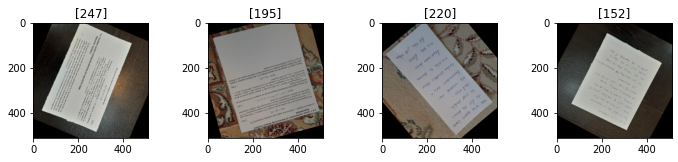

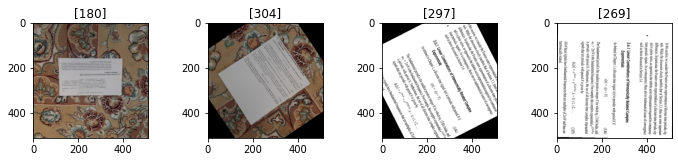

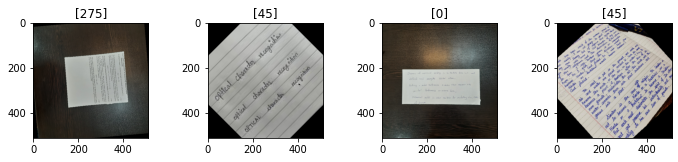

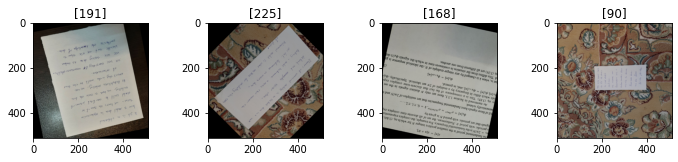

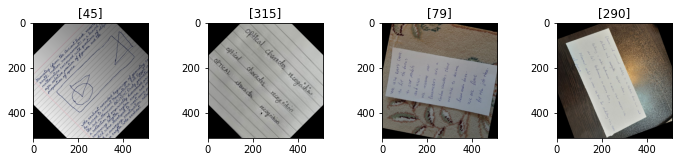

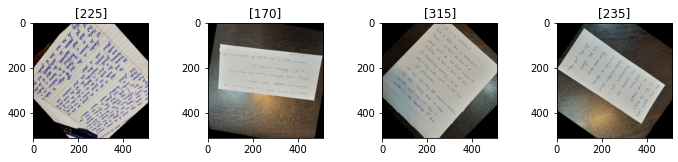

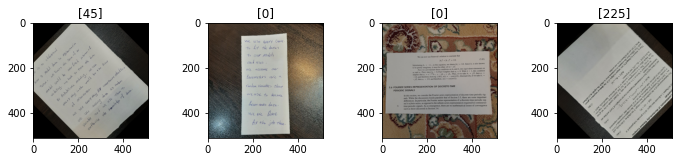

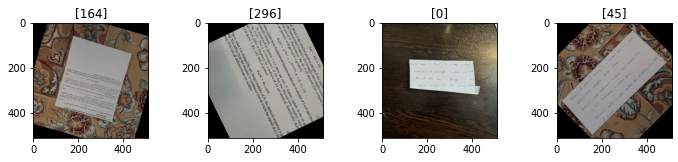

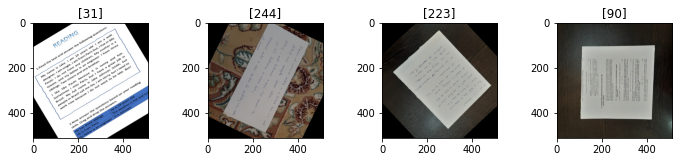

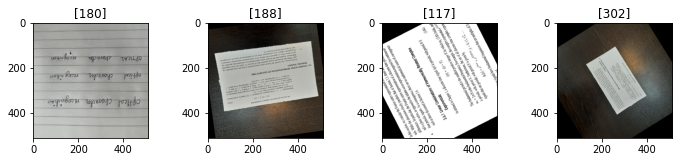

In [64]:
x,m,n,z = data_set.shape
rows = 10
cols = 4
mylist = np.random.randint(0,x,rows*cols)
for row in range(rows):
    axes=[]
    fig = plt.gcf()
    fig.set_size_inches(10, 20)
    for col in range(cols):
        index = mylist[row*cols+col]
        axes.append( fig.add_subplot(rows, cols, col+1) )
        subplot_title=str(labels[index])
        axes[-1].set_title(subplot_title)
        plt.imshow(data_set[index])
    fig.tight_layout()    
    plt.show()

In [65]:
print(device_lib.list_local_devices())
print(data_set.shape)
print(labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data_set, labels, test_size = 0.1,shuffle = True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13643219892329635563
]
(1216, 512, 512, 3)
(1216, 1)
(1094, 512, 512, 3)
(1094, 1)
(122, 512, 512, 3)
(122, 1)


In [11]:
def relu_advanced(x):
    return K.relu(x, max_value= 360)
new_input = Input(shape=(512, 512, 3))
model = keras.models.Sequential()
res = ResNet50(input_tensor=new_input, include_top=False)
inside_layer = keras.models.Sequential()
for l in res.layers:
  l.trainable = False
model.add(res)
model.add(Flatten())
model.add(Dense(1,kernel_initializer='random_normal'))
model.add(Activation(relu_advanced))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 16, 16, 2048)      23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 524289    
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 24,112,001
Trainable params: 524,289
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error', 'mean_absolute_error'])

In [15]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
31/31 [==============================] - 646s 21s/step - loss: 16735.1660 - mean_squared_error: 16735.1660 - mean_absolute_error: 106.3193 - val_loss: 10586.7334 - val_mean_squared_error: 10586.7334 - val_mean_absolute_error: 84.6856
Epoch 2/20
31/31 [==============================] - 647s 21s/step - loss: 7999.7632 - mean_squared_error: 7999.7632 - mean_absolute_error: 76.4212 - val_loss: 7706.7407 - val_mean_squared_error: 7706.7407 - val_mean_absolute_error: 72.3610
Epoch 3/20
31/31 [==============================] - 637s 21s/step - loss: 5518.6206 - mean_squared_error: 5518.6206 - mean_absolute_error: 62.6462 - val_loss: 6006.9346 - val_mean_squared_error: 6006.9346 - val_mean_absolute_error: 63.5175
Epoch 4/20
31/31 [==============================] - 640s 21s/step - loss: 3913.1621 - mean_squared_error: 3913.1621 - mean_absolute_error: 51.4077 - val_loss: 4812.1797 - val_mean_squared_error: 4812.1797 - val_mean_absolute_error: 56.6930
Epoch 5/20
31/31 [=================

In [74]:
model.save("drive/MyDrive/Task/model")

INFO:tensorflow:Assets written to: drive/MyDrive/Task/model/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [66]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv("drive/MyDrive/Task/history.csv")

In [18]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 92s 22s/step - loss: 498.6530 - mean_squared_error: 498.6530 - mean_absolute_error: 14.5028


[498.6529846191406, 498.6529846191406, 14.502828598022461]

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


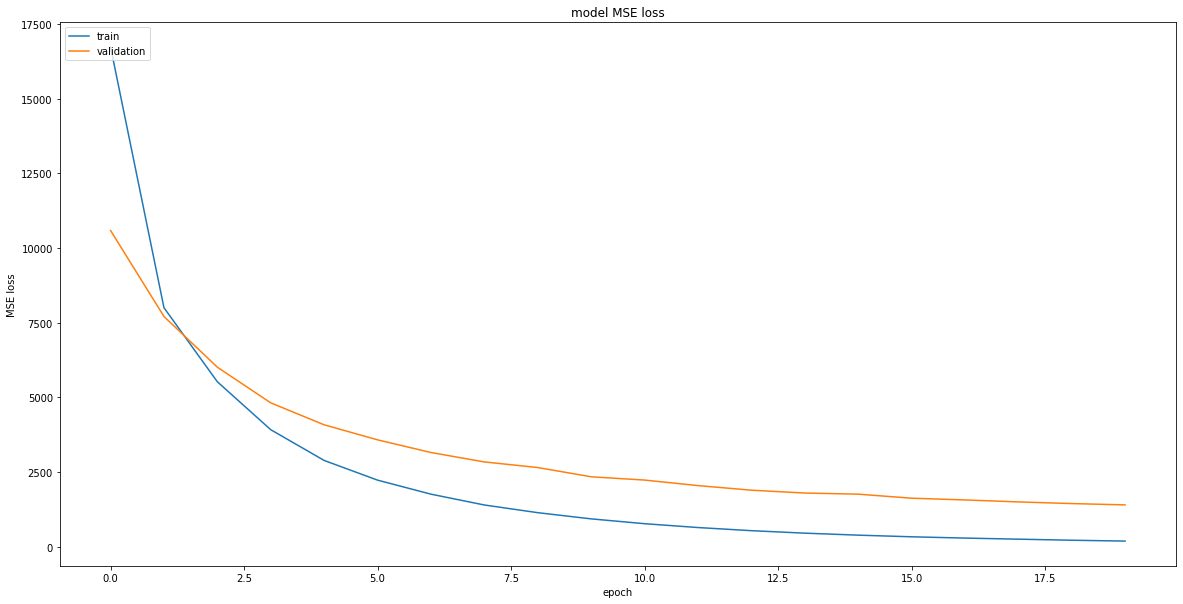

In [67]:
print(history.history.keys())
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('model MSE loss')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("drive/MyDrive/Task/MSE_loss_plot.png")
plt.show()

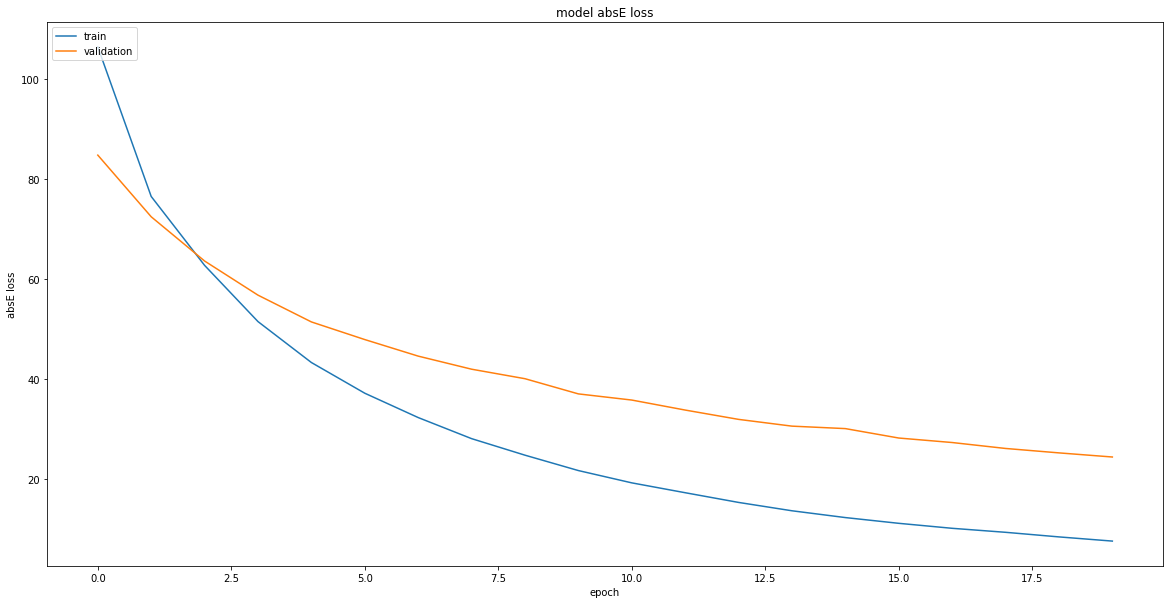

In [77]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('model absE loss')
plt.ylabel('absE loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("drive/MyDrive/Task/absE_loss_plot.png")
plt.show()

In [75]:
model = keras.models.load_model('drive/MyDrive/Task/model')

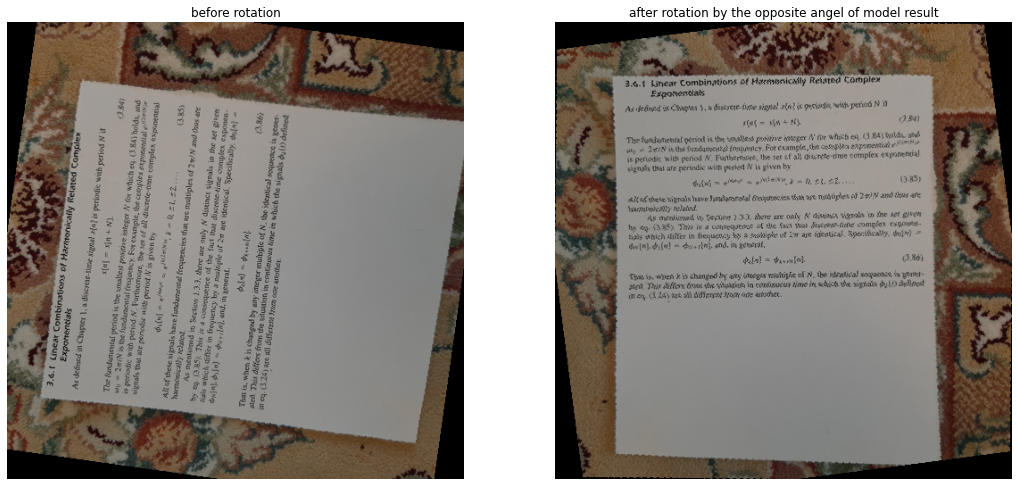

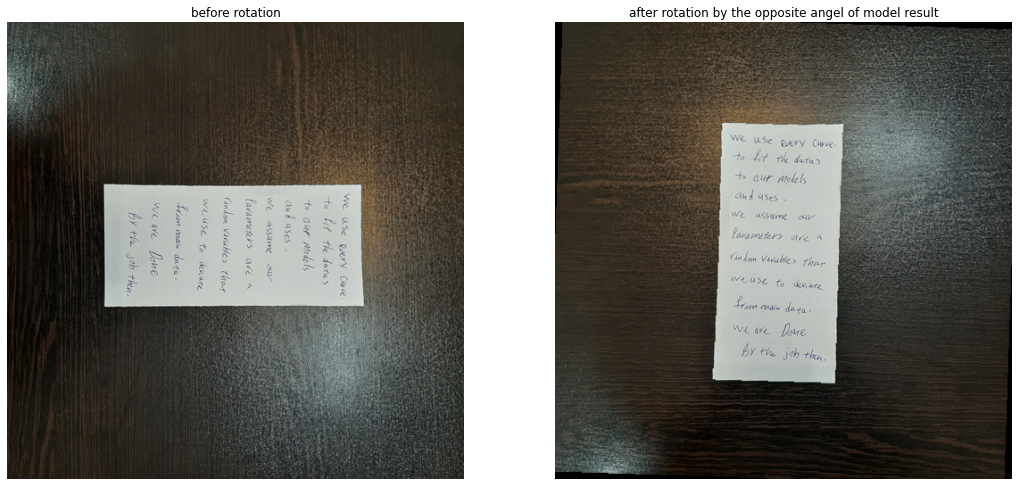

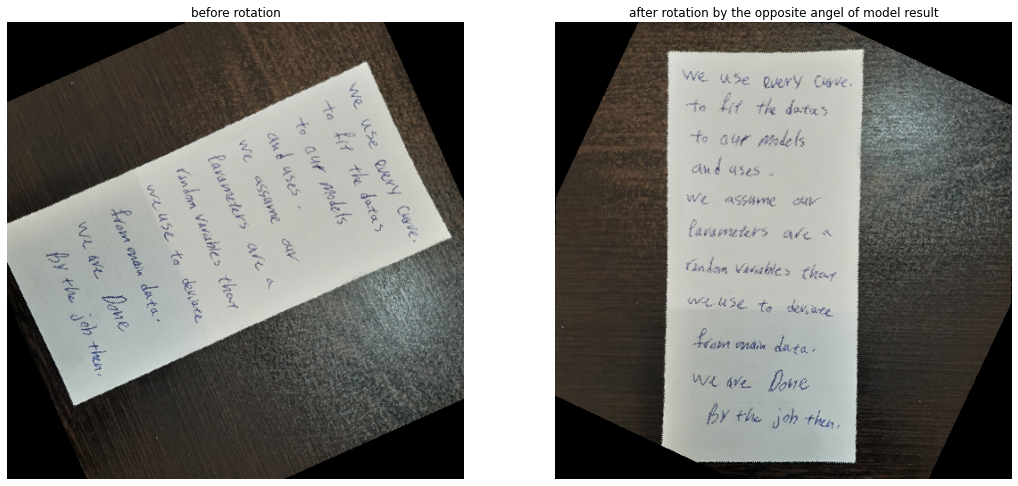

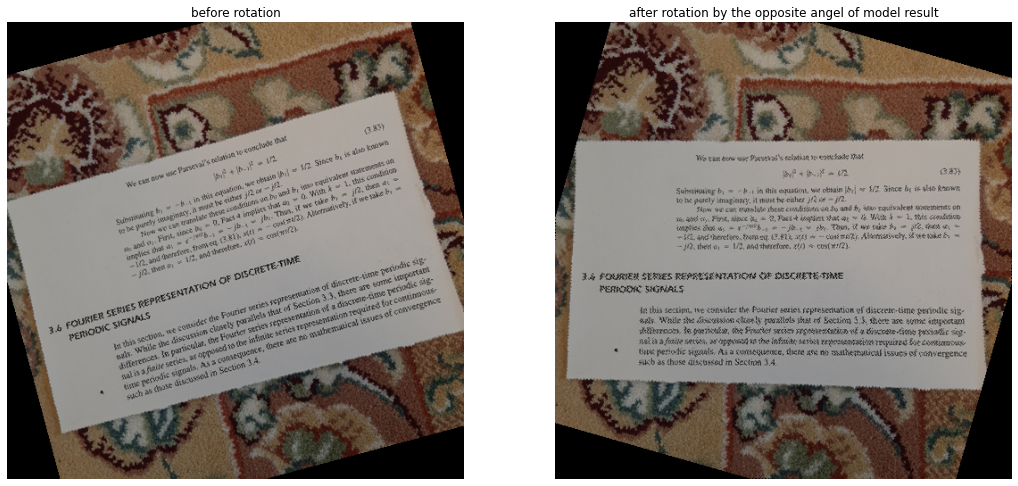

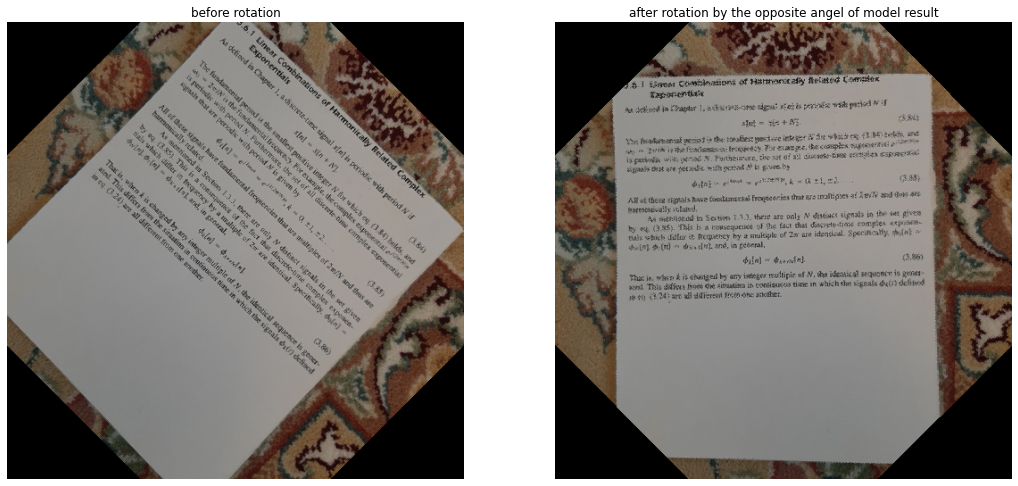

In [73]:
def read_img(path):
    img = Image.open(path)
    img = img.resize((512, 512))
    return np.array(img, dtype=np.uint8)
def get_angel(im,model):
  x = tf.convert_to_tensor(im)
  x = tf.expand_dims(x,axis = 0)
  for l in model.layers:
    x = l(x)
  x = x.numpy()
  return -x[0][0]
m,_,_,_ = X_test.shape
size = 5
i = 1
mylist = np.random.choice(range(m),size)
for index in mylist:
  image_arr = X_test[index]
  image = Image.fromarray(np.uint8(image_arr)).convert('RGB')
  rotate_angel = get_angel(image_arr,model)
  rotated_image = image.rotate(rotate_angel)
  fig = plt.gcf()
  fig.set_size_inches(18, 30)
  fig.add_subplot(1, 2, 1)
  plt.imshow(image)
  plt.axis('off')
  plt.title("before rotation")
  fig.add_subplot(1, 2, 2)
  plt.imshow(rotated_image)
  plt.axis('off')
  plt.title("after rotation by the opposite angel of model result")
  plt.savefig("drive/MyDrive/Task/results/result"+str(i)+".png")
  plt.show()
  i+=1